# ANN Coursework - CNN Technique

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import csv
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [2]:
data_train = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training"
data_test = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing"

path_train = pathlib.Path(data_train)
path_test = pathlib.Path(data_test)

print(path_train)
image_count_train = len(list(path_train.glob('*/*.jpg')))
print(image_count_train)

print(path_test)
image_count_test = len(list(path_test.glob('*/*.jpg')))
print(image_count_test)

C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training
2870
C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing
394


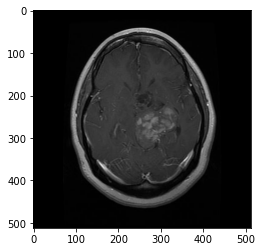

In [3]:
categories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

for category in categories:
    path_tr = os.path.join(path_train,category) # this will map the training path folders to the particular category
  

 # read the image as an array
    
    for img in os.listdir(path_tr):
        img_array_tr = cv2.imread(os.path.join(path_tr,img)) 
        plt.imshow(img_array_tr)
        plt.show()
        break
    break

(-0.5, 127.5, 127.5, -0.5)

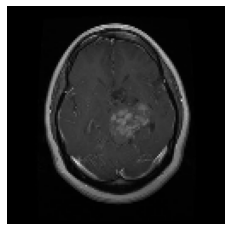

In [4]:
img_size = 128 # we want to convert all our images to have the same size (some might had different sizes)

array1 = cv2.resize(img_array_tr,(img_size, img_size)) # resizing all the images
plt.imshow(array1, cmap ="gray")
plt.axis("off")

In [5]:
train_tumor = []

for i in categories:
    train_path = os.path.join(data_train,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [6]:
X_train = []
y_train = []
for i,j in train_tumor:
    X_train.append(i) # i is basically the images
    y_train.append(j) # is basically the categories
    
X_train = np.array(X_train).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_train.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_train = X_train/255.0 # we devide with 255.0 because the pixel intensity lies between 0 - 255 for mathematical simplification
X_train = X_train.reshape(-1,128,128,1)

(2870, 128, 128)


In [7]:
test_tumor = []

for i in categories:
    test_path = os.path.join(data_test,i)
    tag = categories.index(i)
    for img in os.listdir(test_path):
        try:
            image_arr = cv2.imread(os.path.join(test_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            test_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [8]:
X_test = []
y_test = []
for i,j in test_tumor:
    X_test.append(i) # i is basically the images
    y_test.append(j) # is basically the categories
    
X_test = np.array(X_test).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_test.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_test = X_test/255.0 # we devide with 255.0 because the pixel intensity lies between 0 - 255 for mathematical simplification
X_test = X_test.reshape(-1,128,128,1)

(394, 128, 128)


In [9]:
# convert the brain tumor categories into numbers using one-hot-encoding

y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [10]:
# our dataset is already split into train-test, so we just need to also use some data for validation

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 128, 128, 1)
x_test shape (574, 128, 128, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


# Model creation

In [11]:
cnn_model = Sequential()

############################################################################################################################
# Keras Conv2D is a 2D Convolution Layer, 
# this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
cnn_model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))

cnn_model.add(MaxPool2D(pool_size=(2,2)))

# Dropout is a technique where randomly selected neurons are ignored during training and is used for preventing overfitting
cnn_model.add(Dropout(0.25))
############################################################################################################################
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Dropout(0.25))
############################################################################################################################
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Dropout(0.3))
############################################################################################################################
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Dropout(0.3))

############################################################################################################################
cnn_model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Dropout(0.3))

############################################################################################################################
cnn_model.add(Flatten()) # this converts our image into 1-dimensional for our algorithm to read it (input layer)
cnn_model.add(Dense(1024, activation = "relu")) # here are the neurons we are using for processing , relu is the activation function
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation = "softmax")) # here is the output layer, having 4 neurons because we have 4 classes, softmax is the activation function



In [12]:
#compute model parameters

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
cnn_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       1

In [14]:
epochs = 2 # The number of epochs is the number of complete passes through the training dataset
batch_size = 40 # The batch size is a number of samples processed before the model is updated
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  # we do this for normalising our data 

datagen.fit(X_train)
history = cnn_model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)  

C:\Users\giorg\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
57/57 [==============================] - 93s 2s/step - loss: 1.3863 - accuracy: 0.3346 - val_loss: 1.2931 - val_accuracy: 0.4652
Epoch 2/2
57/57 [==============================] - 91s 2s/step - loss: 1.1732 - accuracy: 0.4782 - val_loss: 1.0454 - val_accuracy: 0.5331


# Model evaluation

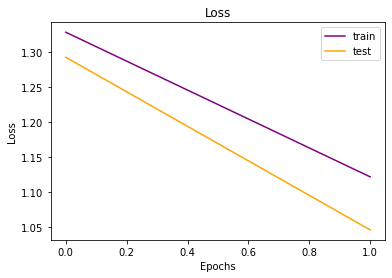

In [15]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

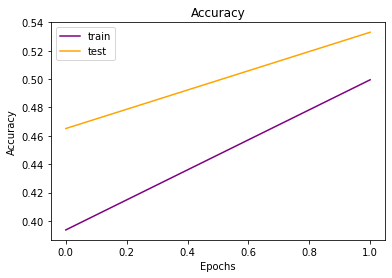

In [16]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [17]:
test_loss, test_acc = cnn_model.evaluate(X_test,  y_test, verbose=2)

13/13 - 4s - loss: 1.5952 - accuracy: 0.2335


In [18]:
test_images =  X_test[:10]
prediction = cnn_model.predict(test_images)
prediction

array([[0.19014995, 0.2645712 , 0.16342188, 0.3818569 ],
       [0.31384164, 0.32140777, 0.05660228, 0.30814824],
       [0.11520951, 0.1790795 , 0.13642982, 0.56928116],
       [0.16008995, 0.15667848, 0.04924388, 0.63398767],
       [0.16008995, 0.15667848, 0.04924388, 0.63398767],
       [0.10511612, 0.1657892 , 0.1235414 , 0.60555327],
       [0.09273967, 0.2202431 , 0.25857836, 0.42843893],
       [0.21720602, 0.22380784, 0.13978222, 0.41920394],
       [0.25219402, 0.2565991 , 0.14194167, 0.3492652 ],
       [0.17775486, 0.25525302, 0.16726336, 0.3997288 ]], dtype=float32)

In [20]:
def derive_predicted_classes(prediction):
    batch_prediction = []
    for vector in prediction:
        batch_prediction.append(np.argmax(vector))
    return batch_prediction
model_prediction = derive_predicted_classes(prediction)
model_prediction

[3, 1, 3, 3, 3, 3, 3, 3, 3, 3]

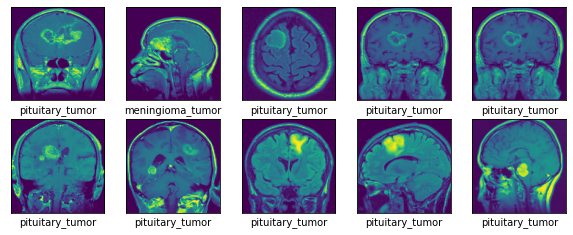

In [22]:
plt.figure(figsize=(10,10))
for i in range(len(test_images)):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(categories[model_prediction[i]])
plt.show()
